# **Ch5. 로지스틱 회귀 : 타이타닉 생존자 예측**

**5-1 문제정의 : 한눈에 보는 예측 목표**

5.2 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd # 판다스 라이브러리 임포트
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url) # 데이터셋 읽기

5.3 데이터 확인하기

In [2]:
data.head( ) # 상위 5행 출력

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [4]:
data.describe( ) # 통계 정보 출력

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [5]:
print(data.dtypes)
print(data.head())

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Embarked     object
Survived      int64
dtype: object
   Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket Embarked  Survived  
0      1      0         A/5 21171        S         0  
1      1      0          PC 17599        C         1  
2      0      0  STON/O2. 3101282        S         1  
3      1      0            113803        S         1  
4      0      0            373450        S         0  


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

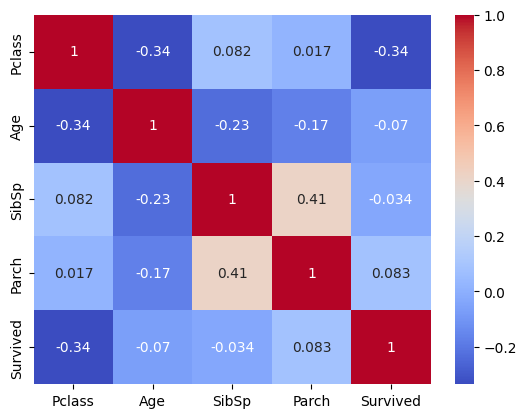

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 열만 선택
numeric_data = data.select_dtypes(include=['number'])

# 상관 관계 계산 및 히트맵 생성
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: >

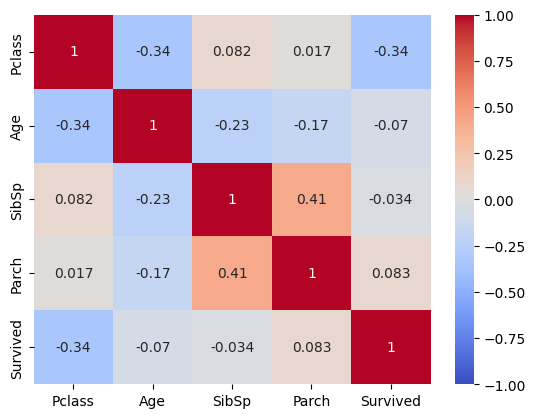

In [8]:
sns.heatmap(numeric_data.corr(), annot = True, cmap='coolwarm', vmin=-1, vmax=1)

5.4 전처리 : 범주형 변수 변환하기(더미 변수와 원-핫 인코딩)

In [9]:
data['Name'].nunique()

889

In [10]:
data['Sex'].nunique( )

2

In [11]:
data['Ticket'].nunique( )

680

In [12]:
data['Embarked'].nunique( )

3

In [13]:
data = data.drop(['Name', 'Ticket'], axis = 1)

In [14]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [15]:
pd.get_dummies(data, columns = ['Sex', 'Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


In [16]:
pd.get_dummies(data, columns = ['Sex', 'Embarked'], drop_first = True)

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


In [17]:
data = pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)

5.5 모델링 및 예측하기

In [18]:
from sklearn.model_selection import train_test_split
X = data.drop('Survived', axis = 1) # 데이터셋에서 종속변수 제거 후 저장
y = data['Survived'] # 데이터셋에서 종속변수만 저장
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100) # 학습셋, 시험셋 분리

In [19]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 임포트

In [20]:
model = LogisticRegression( ) # 로지스틱 회귀 모델 생성
model.fit(X_train, y_train) # 모델 학습

LogisticRegression()

In [21]:
pred = model.predict(X_test) # 예측

5.6 예측 모델 평가하기

In [22]:
from sklearn.metrics import accuracy_score # 정확도 라이브러리 임포트
accuracy_score(y_test, pred) # 실젯값과 예측값으로 정확도 계산

0.7808988764044944

In [23]:
model.coef_

array([[-1.18233609, -0.03991168, -0.32139536,  0.00729936, -2.56911754,
        -0.07694553, -0.23549424]])

In [25]:
len(model.coef_)

1

In [24]:
len(model.coef_[0]) # 첫 번째 값의 길이 출력

7

In [26]:
pd.Series(model.coef_[0], index = X.columns)
# model.coef_를 7개 값이 되도록 풀어서 컬럼 이름을 매핑

,0
Pclass,-1.182336
Age,-0.039912
SibSp,-0.321395
Parch,0.007299
Sex_male,-2.569118
Embarked_Q,-0.076946
Embarked_S,-0.235494


5.7 이해하기 : 피처 엔지니어링(변수 조정)

In [27]:
data['family'] = data['SibSp'] + data['Parch'] # SibSp와 Parch 변수 합치기
data.drop(['SibSp','Parch'], axis=1, inplace=True) # SibSp와 Parch 변수 삭제
data.head( ) # 5행 출력

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


In [28]:
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 100) # 학습셋, 시험셋 준비
model = LogisticRegression( ) # 모델 생성
model.fit(X_train, y_train) # 학습
pred = model.predict(X_test) # 예측
accuracy_score(y_test, pred) # 정확도 계산

0.7921348314606742